## Initial Pathway Inclusion

This notebook contains initial experiments to use pathway data as a catalyst to facilitate finding biclusters of genes that contribute to the same biological processes. The very first idea is to look up which genes collaborate in which pathways. A pathway is then added as a one-hot-encoded vector to the data matrix. An item in this vector is set to 1 if the corresponding gene contributes to the pathway. After finding biclusters, the pathway rows are removed again. Hopefully, this will make it easier for the biclustering algorithm to find biclusters.

For further research: another idea to model the problem including pathway information would be to use a bipartite graph in which one set corresponds to the samples and another set corresponds to the genes. A node between those two sets has a weight that corresponds to the expression level of that gene in the sample. To avoid a fully connection between those two sets, one could remove nodes that have a weight smaller than $\epsilon$. The pathway information could be added by connecting gene nodes with each other that contribute to the same pathway.

 ### Tasks
 * #### Find bi-cluster algorithm to detect overlapping clusters (in the best case with open source)
 * #### Check out BicOverlapper 2.0: visual analysis for gene expression
 * #### How many pathways for the human are there in the KEGG database?
 * #### What would be nice threshoulds for pathways to include them as additional information
 * #### Is PPI based on pathway data or vice versa?
 * #### Structure mid-term presentation

---

## 1. Find bi-cluster algorithm to detect overlapping clusters (in the best case with open source)

- [BiMax](http://ocw.metu.edu.tr/file.php/40/Schedule/reading8.pdf) seems to be able to do that ([OS Implementation](http://www.kemaleren.com/the-bimax-algorithm.html))
- [This](https://bmcbioinformatics.biomedcentral.com/track/pdf/10.1186/1471-2105-13-S18-A10?site=bmcbioinformatics.biomedcentral.com) describes that the problem BiMax is focusing on can be solved more efficiently using the [Bron-Kerbosch algorithm](https://gist.github.com/abhin4v/8304062) to enumerate all maximal bicliques in a bipartite graph.

## 2. Check out BicOverlapper 2.0: visual analysis for gene expression
- Segmentation Fault ...

## 3. How many pathways for the human are there in the KEGG database?
- 322 (http://www.kegg.jp/kegg-bin/search_pathway_text?map=hsa&keyword=&mode=1&viewImage=true)

## 4. What would be nice threshoulds for pathways to include them as additional information
- String's API returns various confidence scores that are based on different data mining techniques:
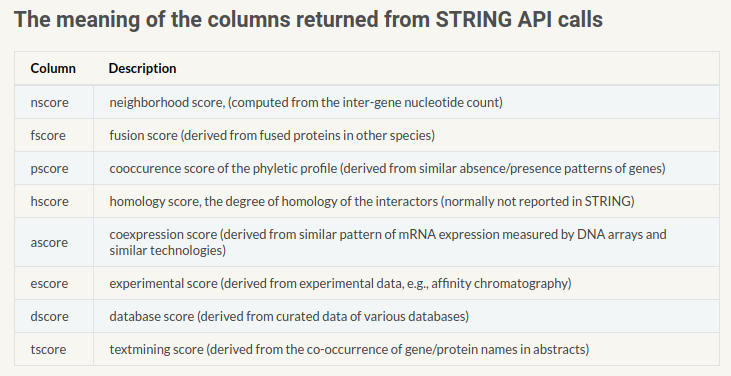
## 5. Is PPI based on pathway data or vice versa?
- PPI (based on STRING) includes KEGG PATHWAY among others: https://en.wikipedia.org/wiki/STRING
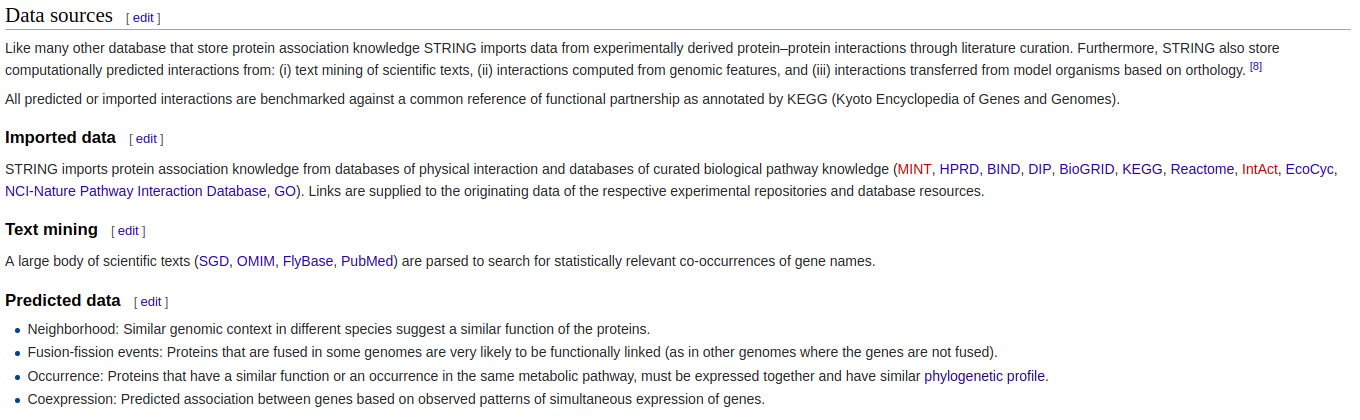
## 6. Structure mid-term presentation
- Present motivation: why is gene-expression analysis necessary?
- What is biclustering and why is it necessary?
- How can pathways help?
- How do we want to include them?

In [36]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
from src.features.download import get_associated_genes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
# The returned results are not invariant with respect to the given gene identifier version
identifiers = ['9606.ENSP00000362116', 'PGC']
for identifier in identifiers:
    print(identifier)
    [print(x) for x in get_associated_genes(identifier=identifier)]

9606.ENSP00000362116
('string:9606.ENSP00000325548', 'CNDP2', 'score:0.765|tscore:0.765')
('string:9606.ENSP00000220509', 'VPS18', 'score:0.743|ascore:0.051|tscore:0.741')
('string:9606.ENSP00000360124', 'PGM1', 'score:0.735|ascore:0.057|tscore:0.731')
('string:9606.ENSP00000270776', 'PGD', 'score:0.734|ascore:0.052|tscore:0.731')
('string:9606.ENSP00000325917', 'PCSK7', 'score:0.732|ascore:0.126|escore:0.528|tscore:0.404')
('string:9606.ENSP00000268171', 'FURIN', 'score:0.725|ascore:0.126|escore:0.528|tscore:0.389')
('string:9606.ENSP00000308024', 'PCSK1', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000300954', 'PCSK4', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000446280', 'PCSK5', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000305056', 'PCSK6', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
PGC
('string:9685.ENSFCAP00000005661', 'FURIN', 'score:0.84|ascore:0.129|escore:0.663|dscore:0.17|tsc

In [95]:
# We thus have to convert our gene name into an identifier StringDB knows first
from src.features.download import get_string_db_identifier
[print(x) for x in get_associated_genes(identifier=get_string_db_identifier('ENSP00000362116'))]

('string:9606.ENSP00000325548', 'CNDP2', 'score:0.765|tscore:0.765')
('string:9606.ENSP00000220509', 'VPS18', 'score:0.743|ascore:0.051|tscore:0.741')
('string:9606.ENSP00000360124', 'PGM1', 'score:0.735|ascore:0.057|tscore:0.731')
('string:9606.ENSP00000270776', 'PGD', 'score:0.734|ascore:0.052|tscore:0.731')
('string:9606.ENSP00000325917', 'PCSK7', 'score:0.732|ascore:0.126|escore:0.528|tscore:0.404')
('string:9606.ENSP00000268171', 'FURIN', 'score:0.725|ascore:0.126|escore:0.528|tscore:0.389')
('string:9606.ENSP00000308024', 'PCSK1', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000300954', 'PCSK4', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000446280', 'PCSK5', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')
('string:9606.ENSP00000305056', 'PCSK6', 'score:0.721|ascore:0.126|escore:0.528|tscore:0.38')


[None, None, None, None, None, None, None, None, None, None]

In [100]:
from src.features.download import save_associated_genes
save_associated_genes()

Links
- https://string-db.org/cgi/network.pl?taskId=ZK2D2EkO77Z7
- https://string-db.org/cgi/network.pl?taskId=zR0L4yeMcEGU
- http://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000096088;r=6:41736711-41754109
- http://www.genecards.org/cgi-bin/carddisp.pl?gene=PGC#pathways_interactions
- https://en.wikipedia.org/wiki/Phylogenetic_profiling